In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import math
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# opening file
data = pd.read_csv("movie.csv")
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                3725 non-null   object 
 1   ReleaseDate          3725 non-null   object 
 2   Color/B&W            3725 non-null   object 
 3   Genre                3725 non-null   object 
 4   Language             3723 non-null   object 
 5   Country              3725 non-null   object 
 6   Rating               3676 non-null   object 
 7   Lead Actor           3722 non-null   object 
 8   Director Name        3725 non-null   object 
 9   Lead Actor FB Likes  3722 non-null   float64
 10  Cast FB Likes        3725 non-null   int64  
 11  Director FB Likes    3725 non-null   int64  
 12  Movie FB Likes       3725 non-null   int64  
 13  IMDb Score (1-10)    3725 non-null   float64
 14  Total Reviews        3724 non-null   float64
 15  Duration (min)       3724 non-null   f

# DATA CLEANING

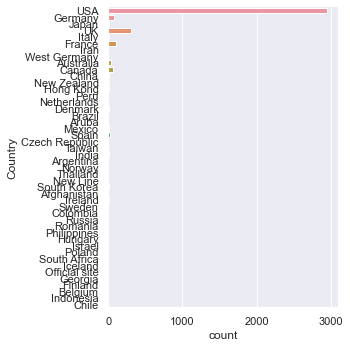

In [3]:
#check the column country 
sb.catplot(y = 'Country', data = data, kind = "count")

In [4]:
#since majority of the movies from this data is from USA, we shall remove the rest
new_d = data[data.Country == 'USA']
new_d

,Title,ReleaseDate,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),GrossRevenue,Budget
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
2,The Broadway Melody,11/11/1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000
3,42nd Street,8/29/1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000
4,Top Hat,4/15/1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000
5,Modern Times,10/7/1936,Black and White,Comedy,English,USA,G,Paulette Goddard,Charles Chaplin,309.0,352,0,0,8.6,120.0,87.0,163245,1500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,Time to Choose,4/27/2015,Color,Documentary,English,USA,NaN,Jane Goodall,Charles Ferguson,21.0,24,117,121,7.0,6.0,100.0,29233,3500000
3718,Tomorrowland,11/7/2015,Color,Action,English,USA,PG,Judy Greer,Brad Bird,2000.0,5046,663,37000,6.5,443.0,130.0,93417865,190000000
3720,Unfinished Business,2/25/2015,Color,Comedy,English,USA,R,Tom Wilkinson,Ken Scott,1000.0,1564,31,0,5.4,90.0,91.0,10214013,35000000
3721,Vacation,8/3/2015,Color,Adventure,English,USA,R,Chris Hemsworth,John Francis Daley,26000.0,40312,0,28000,6.1,204.0,99.0,58879132,31000000


In [5]:
# Check basic statistics of data set
print("Data type : ", type(new_d))
print("Data dims : ", new_d.shape)
print("Data dtypes: ", new_d.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2944, 18)
Data dtypes:  Title                   object
ReleaseDate             object
Color/B&W               object
Genre                   object
Language                object
Country                 object
Rating                  object
Lead Actor              object
Director Name           object
Lead Actor FB Likes    float64
Cast FB Likes            int64
Director FB Likes        int64
Movie FB Likes           int64
IMDb Score (1-10)      float64
Total Reviews          float64
Duration (min)         float64
GrossRevenue             int64
Budget                   int64
dtype: object


In [6]:
# Group the categorical variables that will affect the Gross revenue as one dataframe 
cat=pd.DataFrame(new_d[["Genre","Lead Actor","Director Name"]])
cat.describe()

,Genre,Lead Actor,Director Name
count,2944,2943,2944
unique,17,1171,1404
top,Comedy,Robert De Niro,Steven Spielberg
freq,865,37,23


In [7]:
# Group the numeric variables that will affect the Gross revenue as one dataframe 
num=pd.DataFrame(new_d[["Lead Actor FB Likes","GrossRevenue","Director FB Likes","Budget","IMDb Score (1-10)"]])
num.describe()

,Lead Actor FB Likes,GrossRevenue,Director FB Likes,Budget,IMDb Score (1-10)
count,2943.000000,2.944000e+03,2944.000000,2.944000e+03,2944.000000
mean,8096.227319,5.625481e+07,923.261889,3.893416e+07,6.388689
std,16869.650210,7.167298e+07,3367.772572,4.238307e+07,1.054984
min,0.000000,7.030000e+02,0.000000,2.180000e+02,1.600000
25%,789.000000,1.057182e+07,10.750000,1.000000e+07,5.800000
50%,2000.000000,3.307698e+07,59.500000,2.500000e+07,6.500000
75%,13000.000000,7.367123e+07,234.000000,5.200000e+07,7.100000
max,640000.000000,7.605058e+08,23000.000000,3.000000e+08,9.300000


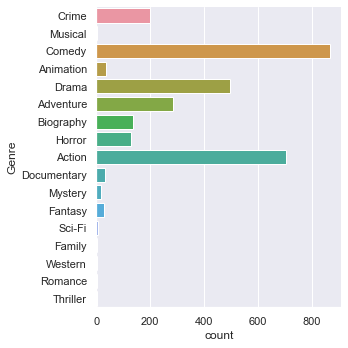

In [8]:
#Check the column Genre
sb.catplot(y = 'Genre', data = cat , kind = "count")

In [9]:
#Remove the Genres that have values close to zero or less than a 100 
r = new_d[new_d.Genre != 'Romance']
m = r[r.Genre != "Musical"]
t = m[m.Genre != 'Thriller']
f = t[t.Genre != 'Family']
w = f[f.Genre != 'Western']
s = w[w.Genre != 'Sci-Fi']
a = s[s.Genre != 'Animation']
d = a[a.Genre != 'Documentary']
M = d[d.Genre != 'Mystery']
F = M[M.Genre != 'Fantasy']
F

,Title,ReleaseDate,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),GrossRevenue,Budget
0,Over the Hill to the Poorhouse,9/15/1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
3,42nd Street,8/29/1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000
4,Top Hat,4/15/1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000
5,Modern Times,10/7/1936,Black and White,Comedy,English,USA,G,Paulette Goddard,Charles Chaplin,309.0,352,0,0,8.6,120.0,87.0,163245,1500000
7,Gone with the Wind,11/12/1939,Color,Drama,English,USA,G,Hattie McDaniel,Victor Fleming,503.0,1862,149,16000,8.2,157.0,226.0,198655278,3977000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,The Witch,12/18/2015,Color,Horror,English,USA,R,Julian Richings,Robert Eggers,648.0,1122,22,43000,6.8,425.0,92.0,25138292,3500000
3718,Tomorrowland,11/7/2015,Color,Action,English,USA,PG,Judy Greer,Brad Bird,2000.0,5046,663,37000,6.5,443.0,130.0,93417865,190000000
3720,Unfinished Business,2/25/2015,Color,Comedy,English,USA,R,Tom Wilkinson,Ken Scott,1000.0,1564,31,0,5.4,90.0,91.0,10214013,35000000
3721,Vacation,8/3/2015,Color,Adventure,English,USA,R,Chris Hemsworth,John Francis Daley,26000.0,40312,0,28000,6.1,204.0,99.0,58879132,31000000


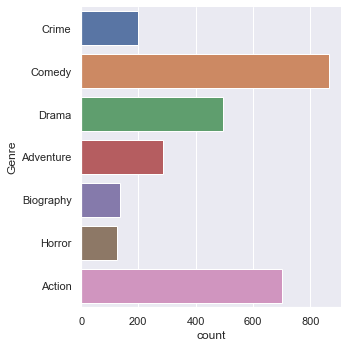

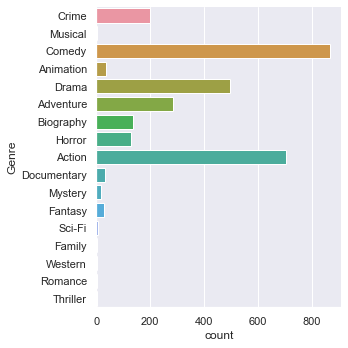

In [10]:
#comparing the new Genre data with the previous.
sb.catplot(y = 'Genre', data = F, kind = "count")
sb.catplot(y = 'Genre', data = cat , kind = "count")

<AxesSubplot:title={'center':'GrossRevenue'}, xlabel='Genre'>

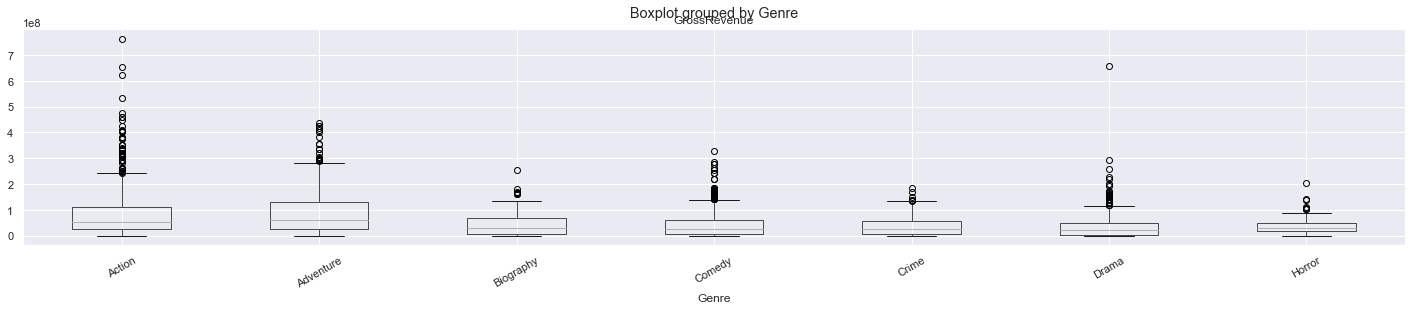

In [11]:
#visualization of genre against Gross renvenue 
New_Price=pd.DataFrame(F[["Genre","GrossRevenue"]])
New_Price.boxplot("GrossRevenue","Genre",rot=30,figsize=(24,4))

In [12]:
#Extracting each variables
Genre = pd.DataFrame(F["Genre"])
Grossrevenue = pd.DataFrame(F["GrossRevenue"])  

<AxesSubplot:xlabel='GrossRevenue', ylabel='Genre'>

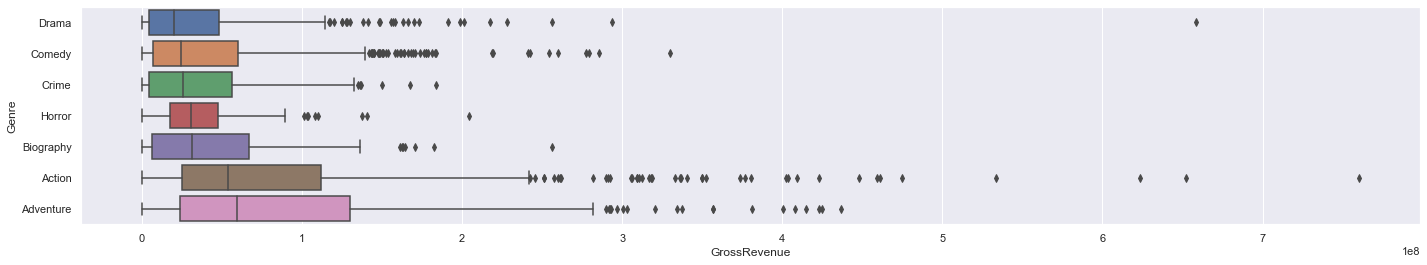

In [13]:
#visualization of genre against Gross renvenue in box plot
new_data = pd.concat([Grossrevenue, Genre], axis = 1).reindex(Grossrevenue.index)

f = plt.figure(figsize=(24, 4))
sb.boxplot(x = "GrossRevenue", y = "Genre", data =new_data, orient = "h",
           order = new_data.groupby('Genre')['GrossRevenue'].median().sort_values().index)

In [14]:
#Extracting variables to a new dataframe
newdata=pd.DataFrame(F[["Lead Actor FB Likes","GrossRevenue","Director FB Likes","Budget","IMDb Score (1-10)","Genre","ReleaseDate"]])
newdata

,Lead Actor FB Likes,GrossRevenue,Director FB Likes,Budget,IMDb Score (1-10),Genre,ReleaseDate
0,2.0,3000000,0,100000,4.8,Crime,9/15/1920
3,610.0,2300000,24,439000,7.7,Comedy,8/29/1933
4,610.0,3000000,10,609000,7.8,Comedy,4/15/1935
5,309.0,163245,0,1500000,8.6,Comedy,10/7/1936
7,503.0,198655278,149,3977000,8.2,Drama,11/12/1939
...,...,...,...,...,...,...,...
3716,648.0,25138292,22,3500000,6.8,Horror,12/18/2015
3718,2000.0,93417865,663,190000000,6.5,Action,11/7/2015
3720,1000.0,10214013,31,35000000,5.4,Comedy,2/25/2015
3721,26000.0,58879132,0,31000000,6.1,Adventure,8/3/2015


C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

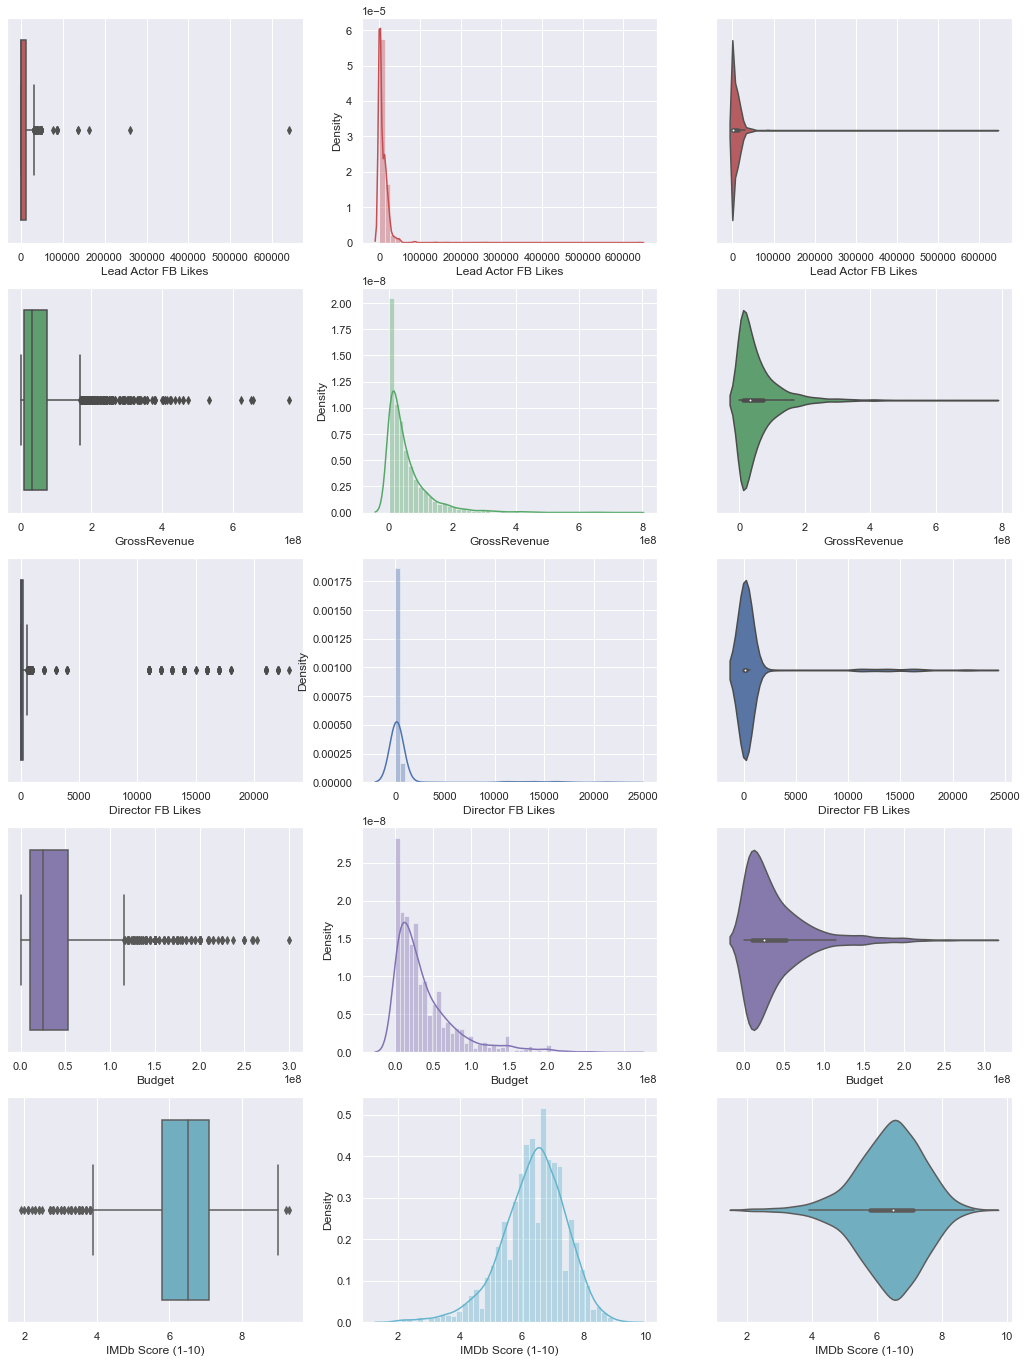

In [15]:
# Draw the distributions of all variables: Multi-variate statistics
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y", "r"]

count = 0
for var in num:
    sb.boxplot(newdata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(newdata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(newdata[var], color = colors[count], ax = axes[count,2])
    count += 1

In [16]:
#Removing the outliners 
q1 = newdata.quantile(0.25)
q3 = newdata.quantile(0.75)
iqr = q3-q1
print(iqr)

df_out = newdata[~((newdata < (q1 - 1.5*iqr)) | (newdata > (q3 + 1.5*iqr))).any(axis=1)]
df_out.describe()

Lead Actor FB Likes       12192.0
GrossRevenue           62839345.0
Director FB Likes           223.0
Budget                 41675000.0
IMDb Score (1-10)             1.3
dtype: float64


C:\Users\Oojy1\AppData\Local\Temp/ipykernel_1296/2696536668.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = newdata[~((newdata < (q1 - 1.5*iqr)) | (newdata > (q3 + 1.5*iqr))).any(axis=1)]


,Lead Actor FB Likes,GrossRevenue,Director FB Likes,Budget,IMDb Score (1-10)
count,2156.000000,2.156000e+03,2156.000000,2.156000e+03,2156.000000
mean,5838.987013,3.834083e+07,101.456865,2.871678e+07,6.316095
std,7291.383561,3.770144e+07,131.588388,2.487442e+07,0.903068
min,0.000000,7.030000e+02,0.000000,2.180000e+02,3.900000
25%,748.000000,8.729788e+06,9.000000,9.000000e+06,5.700000
50%,1000.000000,2.651697e+07,44.000000,2.200000e+07,6.400000
75%,11000.000000,5.670820e+07,145.000000,4.000000e+07,7.000000
max,29000.000000,1.662250e+08,563.000000,1.150000e+08,9.000000


C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Oojy1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

IndexError: index 5 is out of bounds for axis 0 with size 5

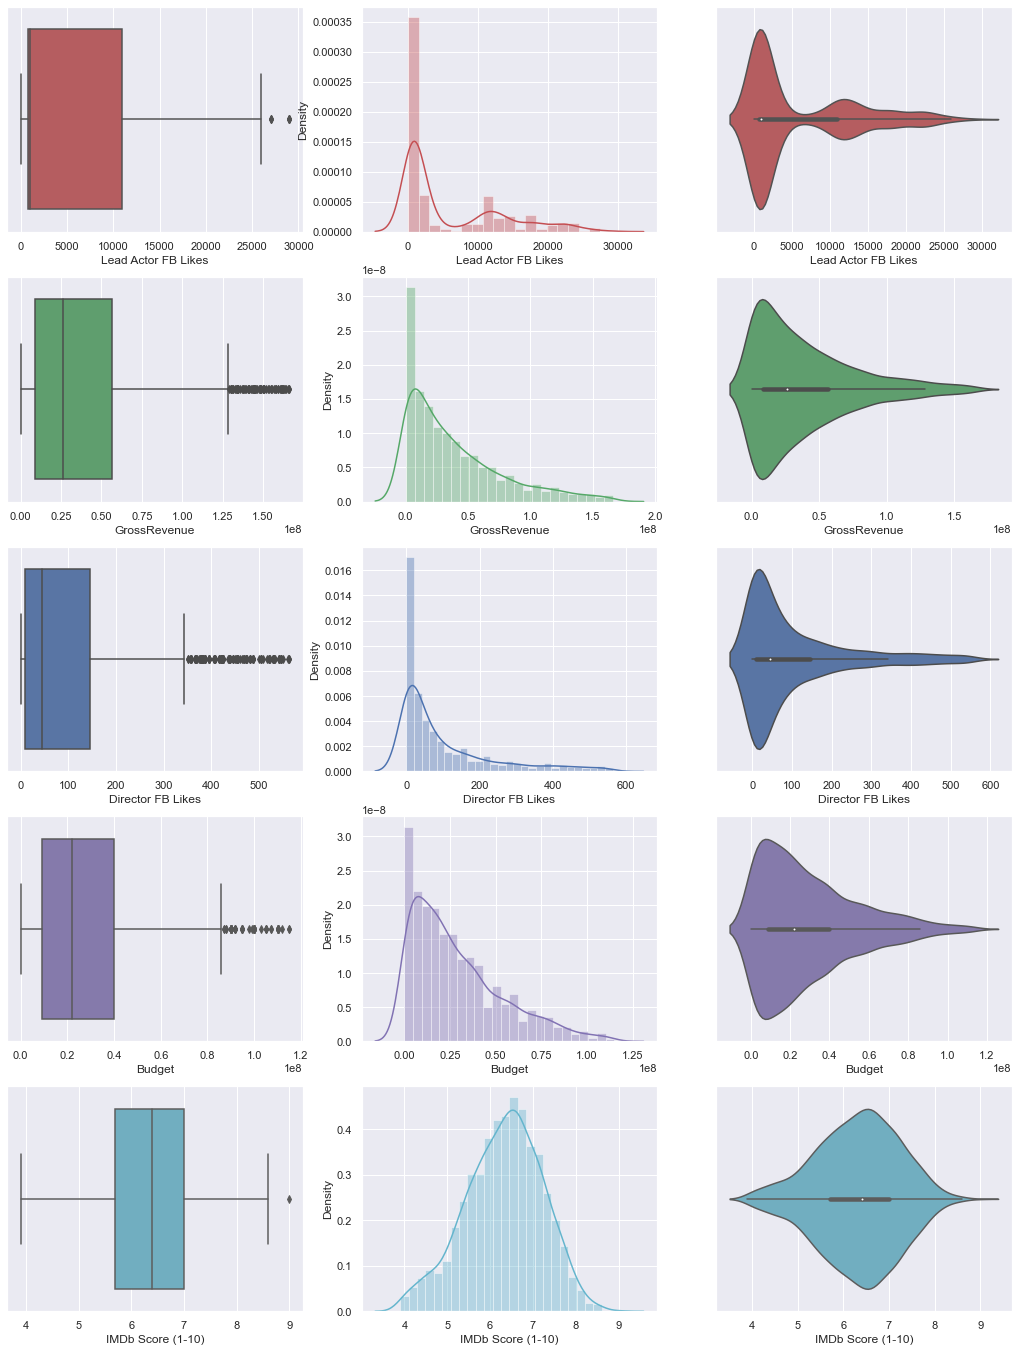

In [17]:
# Draw the distributions of all variables: Multi-variate statistics after cleaning
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y", "r"]

count = 0
for var in df_out:
    sb.boxplot(df_out[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(df_out[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(df_out[var], color = colors[count], ax = axes[count,2])
    count += 1

In [29]:
# Further cleaning as IMDb only started at 1990 and Facebook started on 2004. 
# In order for the data set to have same the values, we shall remove dates before 2004 to make our prediction more accurate.
newdata['ReleaseDate'] = pd.to_datetime(newdata['ReleaseDate'])
newData = pd.DataFrame(newdata[(newdata['ReleaseDate'] >= '2004-01-01')])
newData=newData.dropna()
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 1711 to 3722
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Lead Actor FB Likes  1476 non-null   float64       
 1   GrossRevenue         1476 non-null   int64         
 2   Director FB Likes    1476 non-null   int64         
 3   Budget               1476 non-null   int64         
 4   IMDb Score (1-10)    1476 non-null   float64       
 5   Genre                1476 non-null   object        
 6   ReleaseDate          1476 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 92.2+ KB


In [30]:
#Converting Categorical variable to numeric

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

# OneHotEncoding of categorical predictors (not the response)
newData_cat = newData[['Genre']]
ohe.fit(newData_cat)
OneHotEncoder(handle_unknown='ignore')
newData_cat_ohe = pd.DataFrame(ohe.transform(newData_cat).toarray(), 
                                  columns=ohe.get_feature_names(newData_cat.columns))

# Check the encoded variables


newData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre_Adventure  1476 non-null   float64
 1   Genre_Biography  1476 non-null   float64
 2   Genre_Comedy     1476 non-null   float64
 3   Genre_Crime      1476 non-null   float64
 4   Genre_Drama      1476 non-null   float64
 5   Genre_Horror     1476 non-null   float64
dtypes: float64(6)
memory usage: 69.3 KB


In [31]:
# Combining Numeric features with the OHE Categorical features
newData_num = newData[['Director FB Likes','Budget']]
newData_float = newData[['Lead Actor FB Likes','IMDb Score (1-10)']]
newData_res = newData['GrossRevenue']
newData_ohe = pd.concat([newData_num,newData_float,newData_cat_ohe, newData_res], 
                           sort = True, axis = 1).reindex(index=newData_num.index)

# Check the final dataframe
newData_ohe=newData_ohe.fillna(0)
newData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 1711 to 3722
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Director FB Likes    1476 non-null   float64
 1   Budget               1476 non-null   float64
 2   Lead Actor FB Likes  1476 non-null   float64
 3   IMDb Score (1-10)    1476 non-null   float64
 4   Genre_Adventure      1476 non-null   float64
 5   Genre_Biography      1476 non-null   float64
 6   Genre_Comedy         1476 non-null   float64
 7   Genre_Crime          1476 non-null   float64
 8   Genre_Drama          1476 non-null   float64
 9   Genre_Horror         1476 non-null   float64
 10  GrossRevenue         1476 non-null   float64
dtypes: float64(11)
memory usage: 170.7 KB


<AxesSubplot:>

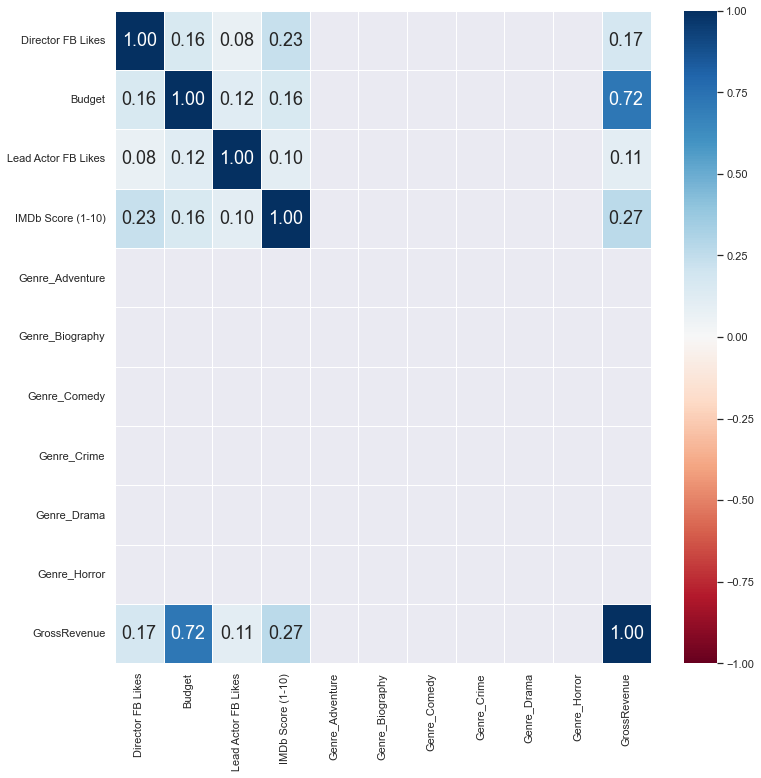

In [32]:
# Determining Relationships between variables

f = plt.figure(figsize=(12, 12))
sb.heatmap(newData_ohe.corr(), vmin = -1, vmax = 1, linewidths = 1,
            annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# MACHINE learning models

# Decision Tree Regression

In [163]:
y =  pd.DataFrame(newData_ohe['GrossRevenue'])
X = pd.DataFrame(newData_ohe.drop('GrossRevenue', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [164]:
from sklearn.tree import DecisionTreeRegressor 

In [165]:
#Train the Decision Tree Regressor model
decisiontree = DecisionTreeRegressor() 
decisiontree.fit(X_train, y_train) 

DecisionTreeRegressor()

In [166]:
decisiontree.score(X_test,y_test)  #Accuracy of using Decision Tree Regression

0.2780158132917514

In [167]:
#Predicting the value of Gross revenue based on the values of X predictors
dt_y_pred = decisiontree.predict(X_test)  

#The predicted y values based on random X predictors in test set
dt_y_pred

array([6.06175900e+06, 1.34520804e+08, 3.57073270e+07, 2.00069408e+08,
       1.91182470e+07, 3.94406550e+07, 2.56757650e+07, 1.25610000e+04,
       1.44694280e+07, 3.19900640e+07, 3.11369500e+07, 7.72649260e+07,
       3.14848200e+06, 4.37926410e+07, 7.05270000e+04, 4.54277500e+06,
       4.53563860e+07, 5.70118470e+07, 7.15023030e+07, 2.30782940e+07,
       3.74906100e+06, 4.78602140e+07, 9.51494350e+07, 6.73443920e+07,
       2.58639150e+07, 5.60442410e+07, 1.57000000e+07, 4.19977900e+07,
       7.36780000e+04, 5.10976640e+07, 1.21463226e+08, 5.18723780e+07,
       1.57979070e+07, 8.42448770e+07, 3.11369500e+07, 3.94624380e+07,
       7.10177840e+07, 4.30976520e+07, 6.49983680e+07, 1.43000000e+05,
       3.19370000e+04, 1.00018837e+08, 3.27216350e+07, 3.92920220e+07,
       1.98776200e+06, 2.40067260e+07, 2.86878350e+07, 5.05491070e+07,
       3.60200630e+07, 2.15010980e+07, 6.82180410e+07, 1.50117807e+08,
       4.71244000e+07, 1.79020854e+08, 8.15935270e+07, 3.51962700e+06,
      

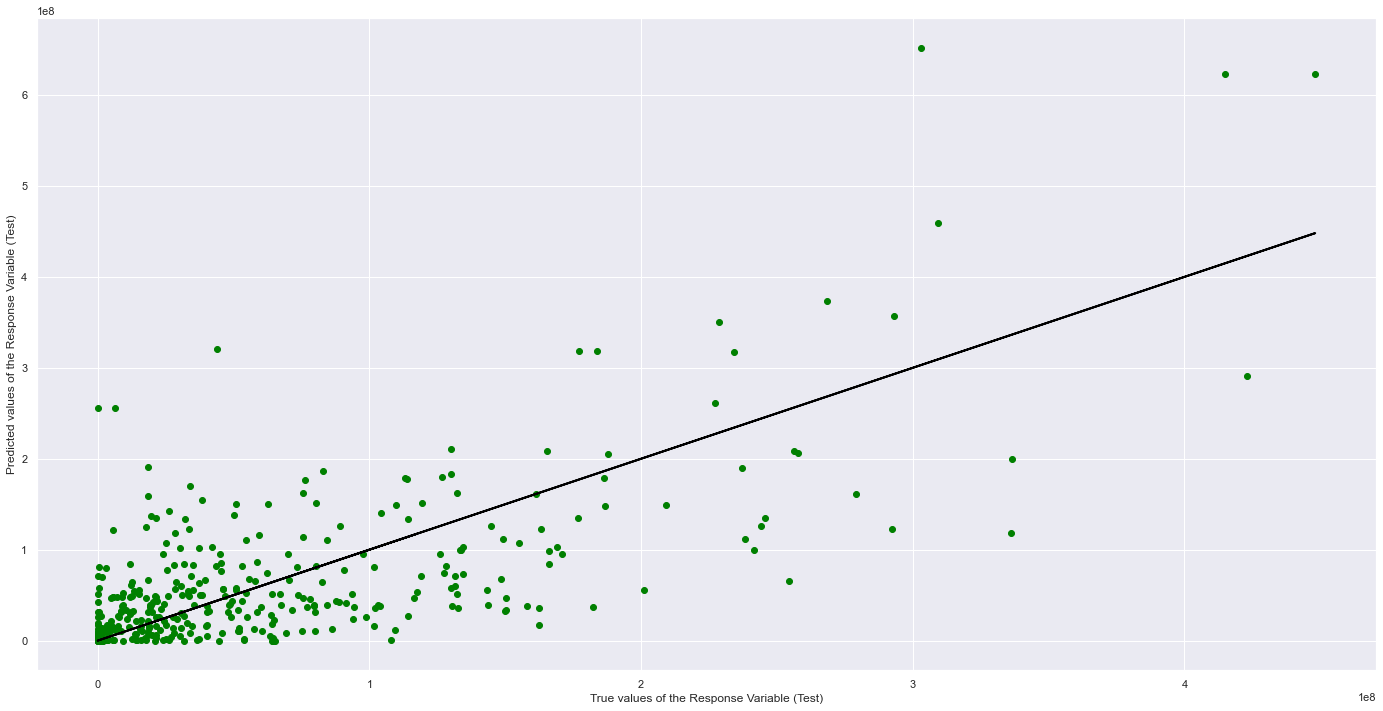

In [168]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y_test, dt_y_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 2)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Multi-Variate Linear Regression

Intercept of Regression 	: b =  [-71429987.21543378]
Coefficients of Regression 	: a =  [[ 5.58091017e+02  1.09775613e+00 -7.28035105e+00  1.26914588e+07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

            Predictors  Coefficients
0    Director FB Likes  5.580910e+02
1               Budget  1.097756e+00
2  Lead Actor FB Likes -7.280351e+00
3    IMDb Score (1-10)  1.269146e+07
4      Genre_Adventure  0.000000e+00
5      Genre_Biography  0.000000e+00
6         Genre_Comedy  0.000000e+00
7          Genre_Crime  0.000000e+00
8          Genre_Drama  0.000000e+00
9         Genre_Horror  0.000000e+00



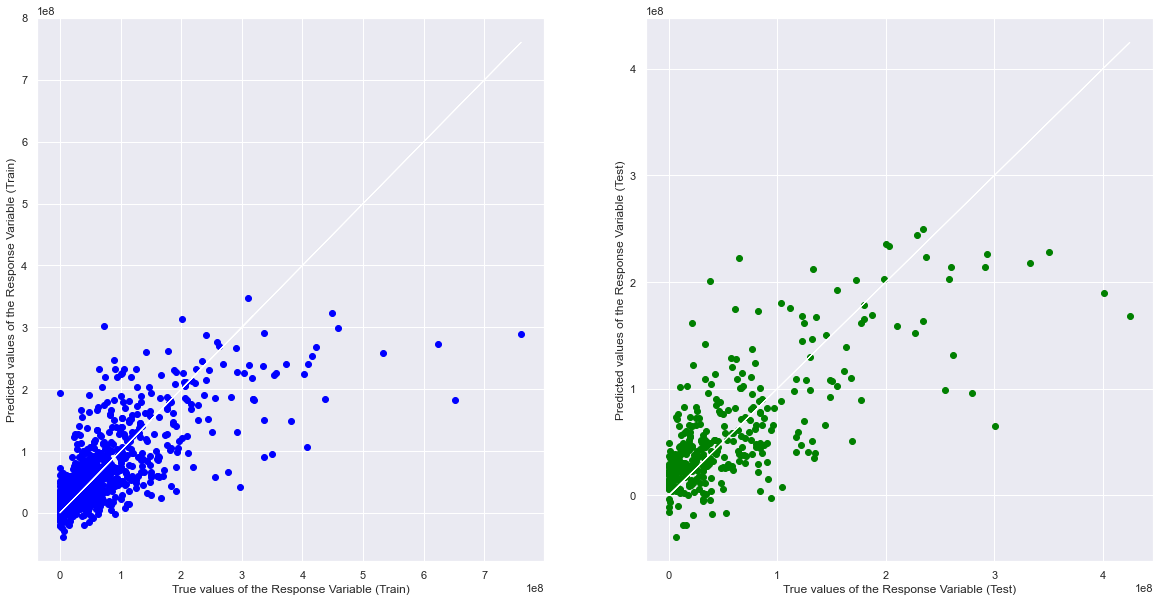

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5549612163444134
Mean Squared Error (MSE) 	: 2900484624843978.5

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5309736744872682
Mean Squared Error (MSE) 	: 2231347710486572.5



In [169]:
# Multi-Variate Linear Regression 

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(newData_ohe['GrossRevenue'])
X = pd.DataFrame(newData_ohe.drop('GrossRevenue', axis = 1)) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Train the Random Forest Regressor model

randomforest = RandomForestRegressor(n_estimators=200) #using 200 random trees to improve accuracy
randomforest.fit(X_train, np.ravel(y_train)) #Ravel returns a 1D flattened array

In [144]:
randomforest.score(X_test,y_test)  #Accuracy of using 200 random trees

0.5142866223498488

In [145]:
#Predicting the value of Gross Revenue based on the values of X predictors
rf_y_pred = randomforest.predict(X_test)  

#The predicted y values based on random X predictors in test set
rf_y_pred

array([3.18401992e+07, 2.15688721e+08, 8.45621159e+07, 2.17477026e+07,
       4.41199850e+07, 3.87976227e+07, 6.25069497e+07, 6.33665320e+07,
       1.50197714e+08, 2.96783922e+07, 1.03214923e+08, 8.37092932e+07,
       4.54662677e+07, 1.46839838e+08, 3.12504285e+08, 3.58448699e+07,
       1.13053572e+07, 1.75744898e+07, 8.21170464e+07, 2.33140617e+07,
       3.95864090e+07, 1.72905600e+07, 2.50791947e+07, 3.74142047e+07,
       9.33485627e+06, 4.64564955e+07, 4.25912068e+07, 3.40267937e+07,
       4.56461114e+07, 1.44098960e+07, 2.54425945e+07, 6.00611761e+06,
       1.66498757e+08, 2.11095357e+07, 2.93735309e+07, 9.66513587e+07,
       1.29034230e+07, 2.28581803e+07, 1.91366262e+07, 1.62084172e+08,
       2.15975777e+06, 2.22305636e+07, 6.44620521e+07, 6.38783994e+07,
       5.51441369e+07, 3.52762940e+07, 3.84311211e+07, 5.06123130e+07,
       3.52526468e+07, 1.38857914e+08, 1.96942469e+07, 2.75813118e+08,
       8.72821265e+06, 8.07244198e+07, 2.69508038e+07, 1.03947308e+08,
      

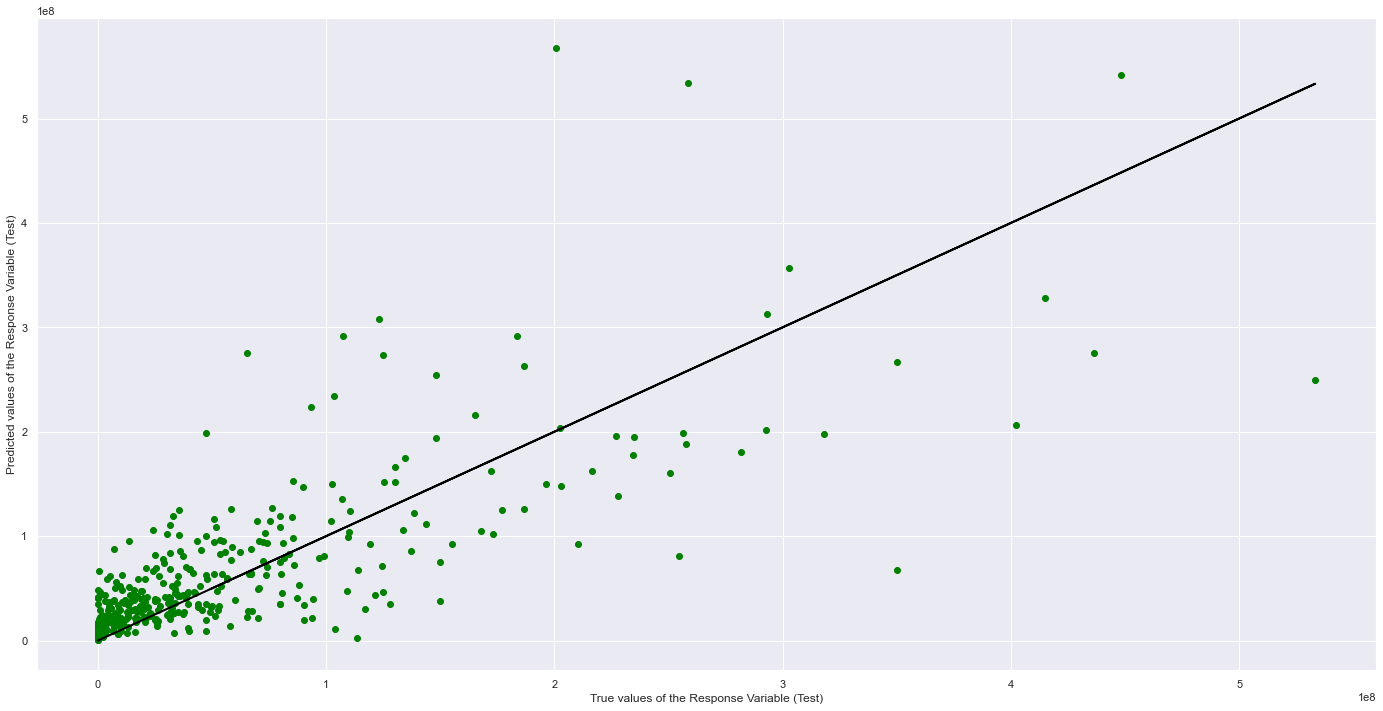

In [146]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y_test, rf_y_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 2)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# K-Nearest Neighbours Regression

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [157]:
# Find the optimal k value

from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = [] 
for K in range(20):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    knn_y_pred = knn.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,knn_y_pred)) #calculate rmse
    rmse.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 74798766.54904924
RMSE value for k=  2 is: 61592236.36761797
RMSE value for k=  3 is: 57760642.83568064
RMSE value for k=  4 is: 56035000.01538825
RMSE value for k=  5 is: 55845135.53391177
RMSE value for k=  6 is: 55064644.63787464
RMSE value for k=  7 is: 53407320.58779167
RMSE value for k=  8 is: 52872626.296368815
RMSE value for k=  9 is: 52241710.47286369
RMSE value for k=  10 is: 52660637.45952501
RMSE value for k=  11 is: 53011733.19153999
RMSE value for k=  12 is: 53372319.14765524
RMSE value for k=  13 is: 53613644.15399352
RMSE value for k=  14 is: 53372526.74342663
RMSE value for k=  15 is: 53452189.06440049
RMSE value for k=  16 is: 54154678.3230668
RMSE value for k=  17 is: 54138011.56076409
RMSE value for k=  18 is: 54197975.98630266
RMSE value for k=  19 is: 54176184.98815213
RMSE value for k=  20 is: 54199704.43782643


<AxesSubplot:>

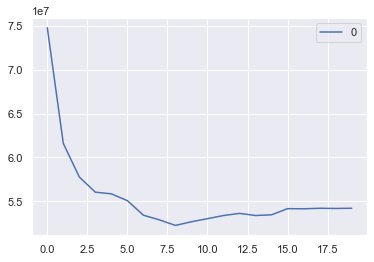

In [158]:
RSME = pd.DataFrame(rmse) #elbow curve 
RSME.plot()

In [159]:
# From above plot, we conclude that the optimal k value is 9

knn5 = KNeighborsRegressor(n_neighbors = 9)
knn5.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [160]:
knn5.score(X_test,y_test)  #Accuracy of using kNN Regression

0.5781378581311769

In [161]:
#Predicting the value of Life Ladder based on the values of X predictors
knn_y_pred = knn5.predict(X_test)  

#The predicted y values based on random X predictors in test set
knn_y_pred

array([[3.59062336e+07],
       [1.90628409e+08],
       [6.57511514e+07],
       [3.17652243e+07],
       [3.73002137e+07],
       [3.90502837e+07],
       [3.84614388e+07],
       [7.48809979e+07],
       [7.89955052e+07],
       [4.09604363e+07],
       [1.66968823e+08],
       [6.04125213e+07],
       [5.60339628e+07],
       [1.07549869e+08],
       [1.76941745e+08],
       [3.40698950e+07],
       [1.95369499e+07],
       [1.81734492e+07],
       [4.19578998e+07],
       [1.44016289e+07],
       [4.29329371e+07],
       [2.46936200e+07],
       [1.34456657e+07],
       [3.69352696e+07],
       [1.25388070e+07],
       [2.77379239e+07],
       [3.65401983e+07],
       [2.80005917e+07],
       [2.25464653e+07],
       [2.32115116e+07],
       [3.37791268e+07],
       [1.24020267e+07],
       [7.74964177e+07],
       [9.66349467e+06],
       [2.15096763e+07],
       [5.52560581e+07],
       [1.17155638e+07],
       [1.96801730e+07],
       [1.32566650e+07],
       [1.65148116e+08],


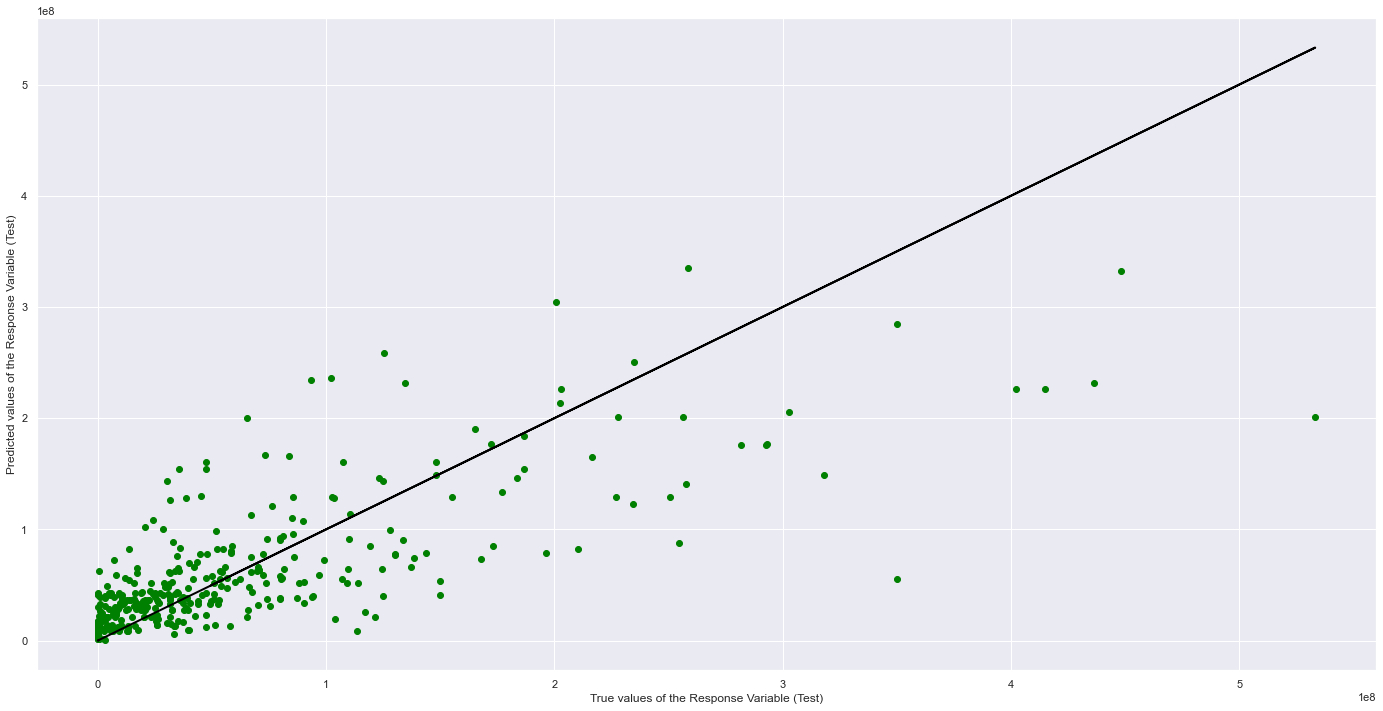

In [162]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y_test, knn_y_pred, color = "green")
plt.plot(y_test, y_test, 'black', linewidth = 2)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.show()